# <center> Program to analyze and find salary of a job profile</center>
### <center>by Sushant Deshpande</center>

I wrote this program so that it can scrape and analyze several jobs listed on Indeed.com or Indeed.ca in this case since I am in Canada and find the average salary of jobs. In addition to this, it also tells us which city in Canada has the maximum number of jobs and maximum salary. I have plotted all this using bar graph to make it visually easy to understand.

 Let's start by asking the user which job title he wants search for. First, we create a variable called <b> *job_title_1*</b> and store the user input in it

In [1]:
#job_title_1 = input("Enter the Job Title: ")
job_title_1 = "Data Analyst"

#### Now let's import the required libries

In [2]:
from bs4 import BeautifulSoup
import requests
import matplotlib.pyplot as plt
from urllib.request import urlopen
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.colors as colors
import time
print('Libraries imported.')

Libraries imported.


The way Indeed works is it takes the given user input, converts it to lower case and replaces the spaces with +. So we need to do the same.

Let's convert the job title to lower case using <b>.lower()</b> method.

Then, let's replace the spaces with + using <b>.repalce()</b> method.

And then let's see how the output looks, <b>job_title_3</b> in this case.

In [3]:
job_title_2 = job_title_1.lower() # convert to lower case
job_title_3 = job_title_2.replace(' ', '+') # replace space with +
job_title_3

'data+analyst'

In our case, since we are searching for <b>Data Scientist</b> the output looks good, <b>*data+scientist*</b>

In [4]:
from datetime import date
today = date.today()

In [5]:
# Textual month, day and year
d2 = today.strftime("%d-%B-%Y")
d2

'08-March-2021'

In [6]:
job_title_lower = job_title_1.lower() # convert to lower case
job_title_us = job_title_2.replace(' ', '_') # replace space with +
job_title_us

'data_analyst'

Now let's write the code that can scrape Indeed.ca with our <b>*job_title_3*</b>

Here we insert job_title_3 into our url using concatenate feature in python

In [7]:
url = 'https://www.indeed.ca/jobs?q='+job_title_3+'&l=canada'
page = requests.get(url)
soup = BeautifulSoup(page.text, "html.parser")
#print(soup.prettify())

Let's check the url that we just parsed, just to be sure.

In [8]:
url

'https://www.indeed.ca/jobs?q=data+analyst&l=canada'

Now that we have the the url, let's write a function that will parse the url, extract the data and store it in a dataframe.

In order to get a proper data set, we need to parse more than one page. So let's write the code to parse first 10 pages and store them in the same dataframe using <b>pd.concat</b> function.

In [9]:
def parse(url):
    time.sleep(10)
    html = requests.get(url)
    soup = BeautifulSoup(html.content, 'html.parser', from_encoding="utf-8")
    df = pd.DataFrame(columns=["Title","Location","Company","Salary"])
    for each in soup.find_all(class_= "result" ):
        time.sleep(10)
        try: 
            title = each.find(class_='jobtitle').text.replace('\n', '')
        except:
            title = 'None'
        try:
            location = each.find('span', {'class':"location" }).text.replace('\n', '')
        except:
            location = 'None'
        try: 
            company = each.find(class_='company').text.replace('\n', '')
        except:
            company = 'None'
        try:
            salary = each.find('span', {'class':'no-wrap'}).text.replace('\n', '')
        except:
            salary = 'None'
        #synopsis = each.find('span', {'class':'summary'}).text.replace('\n', '')
        df = df.append({'Title':title, 'Location':location, 'Company':company, 'Salary':salary}, ignore_index=True)
    return df
df1 = parse(url)
url_1 = url + "&start=20"
url_2 = url + "&start=40"
url_3 = url + "&start=60"
url_4 = url + "&start=80"
url_5 = url + "&start=100"
url_6 = url + "&start=120"
url_7 = url + "&start=140"
url_8 = url + "&start=160"
url_9 = url + "&start=180"
url_10 = url + "&start=200"

df2 = parse(url_1)
time.sleep(10)
df3 = parse(url_2)
time.sleep(10)
df4 = parse(url_3)
time.sleep(10)
df5 = parse(url_4)
time.sleep(10)
df6 = parse(url_5)
time.sleep(10)
df7 = parse(url_6)
time.sleep(10)
df8 = parse(url_7)
time.sleep(10)
df9 = parse(url_8)
time.sleep(10)
df10 = parse(url_9)
time.sleep(10)
df11 = parse(url_10)

data1 = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11], axis=0, ignore_index=True)
data1.head()

,Title,Location,Company,Salary
0,Data Analyst,None,Inter Pipeline,None
1,SAP Master Data Analyst,None,Spartan Controls,None
2,Associé à la gestion des talents émergents - A...,None,Brother Canada,None
3,Data Entry/Data Breach Analyst,Remote,Epiq,$22 an hour
4,"Analyst, Data Management Operations","Bedford, NS",RBC,None


In [10]:
data1.shape

(166, 4)

In [11]:
data1.to_csv('data/data-raw-'+job_title_us+'-'+str(d2)+'.csv', index=False)

Once we have the dataset, we can see that it has a lot of stuff that we don't need like \n, $ etc. So let's clean up the data.

When we check the data type of data1, we can see that <b>Salary</b> is stored as an object. In addition to that, Salary is defined as per year, per month, per week and per hour. In order for our analysis to work, we need to have salary displayed as per year and the column salary itself should be either <b>*float*</b> or <b>*int*</b>.

In [12]:
data1.dtypes # here, salary is an object

Title       object
Location    object
Company     object
Salary      object
dtype: object

In [13]:
data_sal_year_temp = data1[data1['Salary'].str.contains(' a year')].reset_index(drop=True)
data_sal_year_1a = data_sal_year_temp.replace(' a year', '', regex=True) # replace 'a year'
data_sal_year_1 = data_sal_year_1a.replace('\n', '', regex=True) # replace \n
data_sal_year_2 = data_sal_year_1.replace('[\$,)]', '', regex=True) # replace $
data_sal_year_3a = data_sal_year_2['Salary'].str.split('-', expand=True)
data_sal_year_3a.iloc[:, :] = data_sal_year_3a.iloc[:, :].astype('float')
data_sal_year_3b = data_sal_year_3a.sum(axis=1).astype('float')
data_sal_year_3c = (data_sal_year_3b/2)
data_sal_year_3 = data_sal_year_3c.astype('int')
data_sal_year_5 = pd.concat([data_sal_year_2, data_sal_year_3], axis=1, sort=True)
data_sal_year_6 = data_sal_year_5.drop(['Salary'], axis=1)

This segment takes the salary per month and converts it to per year

In [14]:
data_sal_month_temp = data1[data1['Salary'].str.contains(' a month')].reset_index(drop=True)
data_sal_month_1a = data_sal_month_temp.replace(' a month', '', regex=True)
data_sal_month_1 = data_sal_month_1a.replace('\n', '', regex=True)
data_sal_month_2 = data_sal_month_1.replace('[\$,)]', '', regex=True)
data_sal_month_3a = data_sal_month_2['Salary'].str.split('-', expand=True)
data_sal_month_3a.iloc[:, :] = data_sal_month_3a.iloc[:, :].astype('float')
data_sal_month_3b = data_sal_month_3a.sum(axis=1).astype('float')
data_sal_month_3c = (data_sal_month_3b/2) * 12
data_sal_month_3 = data_sal_month_3c.astype('int')
data_sal_month_5 = pd.concat([data_sal_month_2, data_sal_month_3], axis=1, sort=True)
data_sal_month_6 = data_sal_month_5.drop(['Salary'], axis=1)

This segment takes the salary per week and converts it to per year

In [15]:
data_sal_week_temp = data1[data1['Salary'].str.contains(' a week')].reset_index(drop=True)
data_sal_week_1a = data_sal_week_temp.replace(' a week', '', regex=True)
data_sal_week_1 = data_sal_week_1a.replace('\n', '', regex=True)
data_sal_week_2 = data_sal_week_1.replace('[\$,)]', '', regex=True)
data_sal_week_3a = data_sal_week_2['Salary'].str.split('-', expand=True)
data_sal_week_3a.iloc[:, :] = data_sal_week_3a.iloc[:, :].astype('float')
data_sal_week_3b = data_sal_week_3a.sum(axis=1).astype('float')
data_sal_week_3c = (data_sal_week_3b/2) * 52
data_sal_week_3 = data_sal_week_3c.astype('int')
data_sal_week_5 = pd.concat([data_sal_week_2, data_sal_week_3], axis=1, sort=True)
data_sal_week_6 = data_sal_week_5.drop(['Salary'], axis=1)

This segment takes the salary per hour and converts it to per year

In [16]:
data_sal_hour_temp = data1[data1['Salary'].str.contains(' an hour')].reset_index(drop=True)
data_sal_hour_1a = data_sal_hour_temp.replace(' an hour', '', regex=True)
data_sal_hour_1 = data_sal_hour_1a.replace('\n', '', regex=True)
data_sal_hour_2 = data_sal_hour_1.replace('[\$,)]', '', regex=True)
data_sal_hour_3a = data_sal_hour_2['Salary'].str.split('-', expand=True)
data_sal_hour_3a.iloc[:, :] = data_sal_hour_3a.iloc[:, :].astype('float')
data_sal_hour_3b = data_sal_hour_3a.sum(axis=1).astype('float')
data_sal_hour_3c = (data_sal_hour_3b/2) * 40 * 52
data_sal_hour_3 = data_sal_hour_3c.astype('int')
data_sal_hour_5 = pd.concat([data_sal_hour_2, data_sal_hour_3], axis=1, sort=True)
data_sal_hour_6 = data_sal_hour_5.drop(['Salary'], axis=1)

Let's sort the rows that don't have any salary mentioned and save them in <b>data_sal_none_temp</b>

In [17]:
data_sal_none_temp = data1[data1['Salary'].str.contains('None')].reset_index(drop=True)
data_sal_none_temp.head()

,Title,Location,Company,Salary
0,Data Analyst,None,Inter Pipeline,None
1,SAP Master Data Analyst,None,Spartan Controls,None
2,Associé à la gestion des talents émergents - A...,None,Brother Canada,None
3,"Analyst, Data Management Operations","Bedford, NS",RBC,None
4,Data Analyst - Supply Chain,None,Aramark,None


Now let's bring together our newly formed dataset and save it as <b>data_sal_all</b> and rename the table header as <b>Title</b>, <b>Location</b>, <b>Company</b> and <b>Salary</b>

In [18]:
data_sal_all = pd.concat([data_sal_year_6, data_sal_month_6, data_sal_week_6, data_sal_hour_6], axis=0, sort=True)
data_sal_all.columns = ['Title', 'Location', 'Company', 'Salary']
data_sal_all.sort_values(by='Salary',ascending=True, inplace=True)
data_sal_all.head()

,Title,Location,Company,Salary
6,Data Analyst / Quality Assurance Lead,None,Pathstone Mental Health,15129
5,Workforce Management Analyst,None,StorageVault Canada Inc.,18720
2,Junior Data Analyst,Saint-Laurent QC,Groom & Associes,18720
0,Data Entry/Data Breach Analyst,Remote,Epiq,22880
4,Data Analyst,Montréal QC,MSi Corp (Bell Canada,36400


Now, let's join the two data sets, <b>data_sal_all</b> and <b>data_sal_none_temp</b> and save them in <b>data_sal_all_1</b>

In [19]:
data_sal_all_1 = pd.concat([data_sal_all, data_sal_none_temp], axis=0, sort=True)
data_sal_all_1.head()

,Company,Location,Salary,Title
6,Pathstone Mental Health,None,15129,Data Analyst / Quality Assurance Lead
5,StorageVault Canada Inc.,None,18720,Workforce Management Analyst
2,Groom & Associes,Saint-Laurent QC,18720,Junior Data Analyst
0,Epiq,Remote,22880,Data Entry/Data Breach Analyst
4,MSi Corp (Bell Canada,Montréal QC,36400,Data Analyst


Let's see the shape of <b>data_sal_all_1</b>

In [20]:
data_sal_all_1.shape

(166, 4)

The shape of <b>data_sal_all_1</b> is <b>(283, 5)</b> which is same as the shape of <b>data1</b>.
This proves that we successfully managed to merge the 2 datasets without missing any row.

Now let's replace <b>'None'</b> values with <b>np.nan</b> and change the data type of <b>Salary</b> to *float*

In [21]:
data5a = data_sal_all_1.replace('None',np.nan, regex=True)
data5a['Salary'].astype('float')

6      15129.0
5      18720.0
2      18720.0
0      22880.0
4      36400.0
6      37440.0
1      37500.0
2      37500.0
3      39998.0
9      40352.0
7      40500.0
11     40560.0
1      41600.0
3      45000.0
0      57500.0
10     65520.0
7      67600.0
9      74136.0
8      75717.0
5      75717.0
8      78000.0
4      79000.0
10     93356.0
0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
        ...   
113        NaN
114        NaN
115        NaN
116        NaN
117        NaN
118        NaN
119        NaN
120        NaN
121        NaN
122        NaN
123        NaN
124        NaN
125        NaN
126        NaN
127        NaN
128        NaN
129        NaN
130        NaN
131        NaN
132        NaN
133        NaN
134        NaN
135        NaN
136        NaN
137        NaN
138        NaN
139        NaN
140        NaN
141        NaN
142        NaN
Name: Salary, Length: 166, dtype: float64

Now, let's find the mean of the the cell Sa;ary using the .mean() method

In [22]:
mean_1 = data5a['Salary'].mean()
mean_1

49515.0

We can now replace the np.nan cells with the mean salary obtained in the previous step.

Let's also change the datatype to *int*

In [23]:
data5b = data5a['Salary'].replace(np.nan, mean_1)
data5ba = data5b.astype('int')

Let's concact this salary to our previous dataframe <b>data_sal_all_1</b>

In [24]:
data5c = pd.concat([data_sal_all_1, data5ba], axis=1)
data5c.reset_index()

,index,Company,Location,Salary,Title,Salary
0,6,Pathstone Mental Health,None,15129,Data Analyst / Quality Assurance Lead,15129
1,5,StorageVault Canada Inc.,None,18720,Workforce Management Analyst,18720
2,2,Groom & Associes,Saint-Laurent QC,18720,Junior Data Analyst,18720
3,0,Epiq,Remote,22880,Data Entry/Data Breach Analyst,22880
4,4,MSi Corp (Bell Canada,Montréal QC,36400,Data Analyst,36400
5,6,SkyIT Services Ltd.,Calgary AB,37440,IT Business Analyst,37440
6,1,Prodigy Systems Inc.,Toronto ON,37500,Junior Data Analyst,37500
7,2,Prodigy Systems Inc.,Toronto ON,37500,Junior Data Analyst,37500
8,3,Wheel King Transhaul Inc,Milton ON,39998,database analyst,39998
9,9,Iron Service Global Canada Inc.,Toronto ON,40352,information systems business analyst,40352


Now we have two Salary columns in our dataframe, so we rename the old one to Salary_1 and drop it.

In [25]:
data5c.columns = ['Company', 'Location', 'Salary_1', 'Title', 'Salary']
data5d = data5c.drop(['Salary_1'], axis=1)
data5d.head()

,Company,Location,Title,Salary
6,Pathstone Mental Health,None,Data Analyst / Quality Assurance Lead,15129
5,StorageVault Canada Inc.,None,Workforce Management Analyst,18720
2,Groom & Associes,Saint-Laurent QC,Junior Data Analyst,18720
0,Epiq,Remote,Data Entry/Data Breach Analyst,22880
4,MSi Corp (Bell Canada,Montréal QC,Data Analyst,36400


In [26]:
data5d.to_csv('data/data-'+job_title_us+'-'+str(d2)+'.csv', index=False)

Let's procede with the cleanup of our dataset. Let's drop the cells that don't have any location as it won't be useful to us in our analysis.

In [27]:
data6a = data5d.replace('None',np.nan, regex=True)
data6 = data6a[pd.notnull(data5d["Location"])]
data6 = data6.reset_index(drop=True)
data7 = data6.groupby('Location').count()
sort_data = data7.sort_values('Title',ascending=False)

In [28]:
sort_data.head(10)

,Company,Title,Salary
Location,,,
"Toronto, ON",22,22,22
"Calgary, AB",13,13,13
Canada,7,7,7
Remote,6,6,6
Toronto ON,6,6,6
"Mississauga, ON",5,5,5
"Vancouver, BC",5,5,5
"Montréal, QC",4,4,4
"Waterloo, ON",4,4,4


As we can see above, <b>sort_data</b> has a location <b>Canada</b>. We need to drop that row. Since we made our code flexible by asking the user to input his job title, this field might not show up in other job titles. Hence we need to write the code that will check if this field is there, and if it, drop it, else procede without doing anything.

In [29]:
sort_data_canada_1 = sort_data.reset_index()
sort_data_canada_2 = sort_data_canada_1.iloc[:, 0]
sort_data_canada_3 = sort_data_canada_2.isin(['Canada'])

In [30]:
if sort_data_canada_3.any() == True:
    sort_data_1 = sort_data.drop(['Canada'], axis=0)
else:
    sort_data_1 = sort_data

In [31]:
sort_data_2 = sort_data_1.reset_index()
sort_data_2.head()

,Location,Company,Title,Salary
0,"Toronto, ON",22,22,22
1,"Calgary, AB",13,13,13
2,Remote,6,6,6
3,Toronto ON,6,6,6
4,"Mississauga, ON",5,5,5


Now let's split the location into <b>City</b> and <b>Provience</b>

In [32]:
data1 = sort_data_2['Location'].str.split(',', expand=True)
data1.columns = ['City', 'Provience']
data1.head()

,City,Provience
0,Toronto,ON
1,Calgary,AB
2,Remote,None
3,Toronto ON,None
4,Mississauga,ON


Now let's merge this new data with the previous data and drop the column <b>Location</b>

In [33]:
data2 = pd.concat([data1, sort_data_2], axis=1, sort=False)
data3 = data2.drop(['Location'], axis=1)
data3.head()

,City,Provience,Company,Title,Salary
0,Toronto,ON,22,22,22
1,Calgary,AB,13,13,13
2,Remote,None,6,6,6
3,Toronto ON,None,6,6,6
4,Mississauga,ON,5,5,5


Let's see which <b>Provience</b> has the maximum number of jobs.

In [34]:
data4 = data3.groupby('Provience')['Title'].apply(lambda x: ', '.join(x.astype(str))).reset_index()
data5 = data4['Title'].str.split(',', expand=True)
data5.iloc[:, :] = data5.iloc[:, :].astype(float)
data5['Total'] = data5.sum(axis=1).astype(int)
data8 = data5.loc[:, 'Total']
data9 = data4.loc[:, 'Provience']
data10 = pd.concat([data9, data8], axis=1, sort=True)
data10

,Provience,Total
0,AB,14
1,BC,9
2,MB,2
3,NB,4
4,NS,2
5,ON,53
6,QC,12


Let's sort the dataframe by which <b>City</b> has the maximum number of jobs and arrange it in ascending order.

In [35]:
data11 = sort_data_1
data11.sort_values(by='Title', ascending=True, inplace=True)
data12 = data11.loc[:, 'Title']
data13 = data12.tail(15)
data13

Location
Dorval, QC             2
Bedford, QC            2
Woodbridge, ON         2
Saint-Augustin, QC     2
Winnipeg, MB           2
Brampton, ON           3
Markham, ON            3
Waterloo, ON           4
Montréal, QC           4
Vancouver, BC          5
Mississauga, ON        5
Toronto ON             6
Remote                 6
Calgary, AB           13
Toronto, ON           22
Name: Title, dtype: int64

Now let's make sure we don't have any duplicated in our dataframe

In [36]:
data5d.drop_duplicates(keep=False,inplace=True)
data5d.head()

,Company,Location,Title,Salary
6,Pathstone Mental Health,None,Data Analyst / Quality Assurance Lead,15129
5,StorageVault Canada Inc.,None,Workforce Management Analyst,18720
2,Groom & Associes,Saint-Laurent QC,Junior Data Analyst,18720
0,Epiq,Remote,Data Entry/Data Breach Analyst,22880
4,MSi Corp (Bell Canada,Montréal QC,Data Analyst,36400


As we can see, many job titles have the same salary listed. For our last step, data visualization, we don’t need same salaries for different job titles, we just need one. So we group them by salary and then sort them in ascending order.

In [37]:
data5e = data5d.groupby('Salary')['Company'].apply(' '.join).reset_index()
data5e.sort_values(by='Salary', ascending=True, inplace=True)

In [38]:
data_sal_all_1 = data5e.loc[:,'Salary']
data_sal_all_2 = data_sal_all_1.tail(15)
data_sal_all_2

5     39998
6     40352
7     40500
8     40560
9     41600
10    45000
11    49515
12    57500
13    65520
14    67600
15    74136
16    75717
17    78000
18    79000
19    93356
Name: Salary, dtype: int64

Now, let's plot which city has the maximum number of jobs.

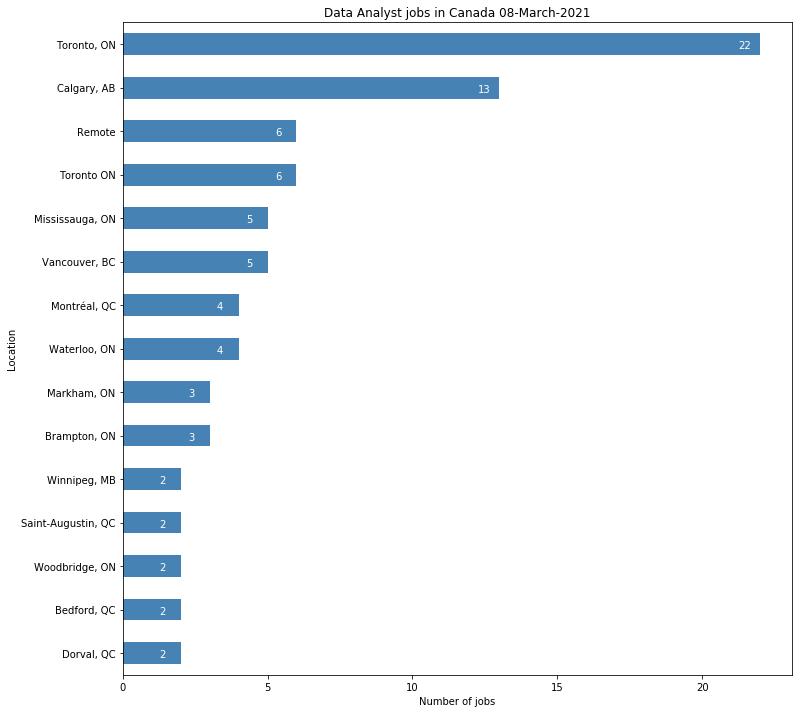

In [39]:
data13.plot(kind='barh', figsize=(12, 12), color='steelblue')
plt.xlabel('Number of jobs')
plt.title(job_title_1+' jobs in Canada '+str(d2))

for index, value in enumerate(data13): 
    label = format(int(value), ',')
    
    plt.annotate(label, xy=(value - 0.75, index - 0.10), color='white')
plt.savefig('images/'+job_title_us+'_jobs_in_Canada-'+str(d2))
plt.show()

Let's plot the salary range as well.

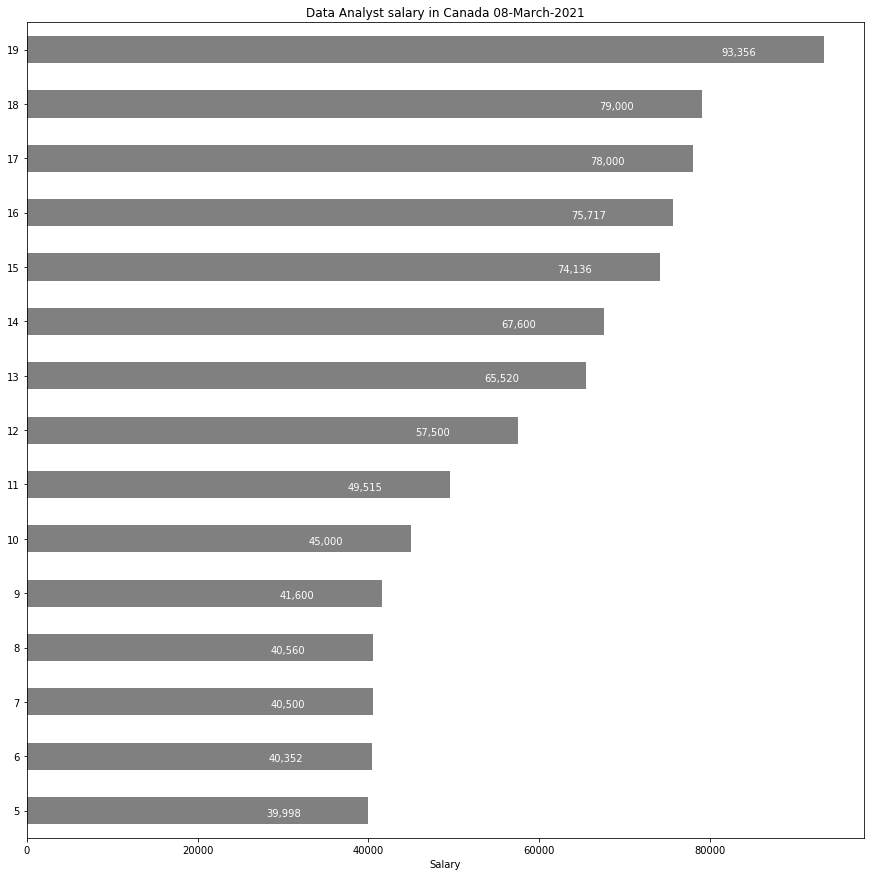

In [40]:
data_sal_all_2.plot(kind='barh', figsize=(15, 15), color='grey')
plt.xlabel('Salary')
plt.title(job_title_1+' salary in Canada '+str(d2))

for index, value in enumerate(data_sal_all_2): 
    label = format(int(value), ',') # format int with commas
    
    plt.annotate(label, xy=(value - 12000, index - 0.10), color='white')
plt.savefig('images/'+job_title_us+'_salary_in_Canada-'+str(d2))
plt.show()